<a href="https://colab.research.google.com/github/seifdabous7/deep-nural-network/blob/main/deep_nural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
df = data.copy()

In [ ]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
df = df.drop(['carrier','carrier_name','airport','airport_name'],axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
year,0
month,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0
nas_ct,0
security_ct,0
late_aircraft_ct,0
arr_cancelled,0


In [ ]:
df['weather_delay'].min(),df['weather_delay'].max()

(0.0, 57707.0)

In [ ]:
df['WDCase'] = df['weather_delay'].apply(lambda x: 1 if x>100 else 0)

In [ ]:
x  = df.drop(['WDCase'],axis = 1)
y = df['WDCase']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)

In [ ]:
print('x_train shape is :',x_train.shape)
print('x_test shape is:',x_test.shape)
print('y_train shape is :',y_train.shape)
print('y_test shape is :',y_test.shape)

x_train shape is : (237951, 17)
x_test shape is: (79317, 17)
y_train shape is : (237951,)
y_test shape is : (79317,)


In [ ]:
import tensorflow as tf
import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train ,validation_data=(x_test,y_test), epochs=10,batch_size=10000,verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6594 - loss: 0.6347 - val_accuracy: 0.7737 - val_loss: 0.5179
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7405 - loss: 0.5402 - val_accuracy: 0.7855 - val_loss: 0.4679
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7706 - loss: 0.4992 - val_accuracy: 0.7818 - val_loss: 0.4498
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7776 - loss: 0.4797 - val_accuracy: 0.7844 - val_loss: 0.4327
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7869 - loss: 0.4615 - val_accuracy: 0.7884 - val_loss: 0.4166
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7923 - loss: 0.4474 - val_accuracy: 0.8028 - val_loss: 0.4012
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8083 - loss: 0.4230 - val_accuracy: 0.8247 - val_loss: 0.3756
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8162 - loss: 0.4014 - val_accuracy: 0.8330 - v

In [ ]:
model.save('model.keras')

In [ ]:
y_pred = model.predict(x_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
print('prediciton items are{}'.format(y_pred[:5]))

prediciton items are[[0.781029  ]
 [0.92460567]
 [0.03504629]
 [0.03504629]
 [0.03504629]]


In [ ]:
y_test[:5]

,WDCase
256596,1
6930,1
125951,0
87817,0
42037,0


In [ ]:
modelloss,modelAccuracy = model.evaluate(x_test,y_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.3180


In [ ]:
print(modelAccuracy)

0.8553651571273804


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[47876  5848]
 [ 5624 19969]]


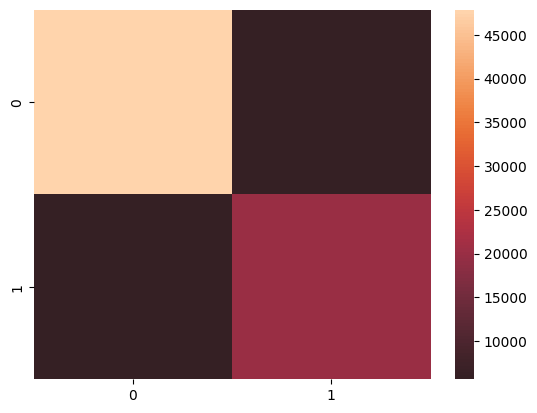

In [ ]:
sns.heatmap(cm,center= True)
plt.show()

In [ ]:
def value (x):
  if x <= 30:
    return 0
  elif x <= 100:
    return 1
  elif x <= 200:
      return 2
  else:
      return 3

In [ ]:
df['WDCase'] = df['weather_delay'].apply(lambda x: value(x))

In [ ]:
df['WDCase'].value_counts()

,count
WDCase,
0,164988
3,68251
1,50128
2,33901


In [ ]:
x = df.drop(['WDCase'], axis=1).astype('float32')
y = df['WDCase'] - 1

In [ ]:
mask_train = y_train != -1
x_train_clean = x_train[mask_train]
y_train_clean = y_train[mask_train]

In [ ]:
mask_test = y_test != -1
x_test_clean = x_test[mask_test]
y_test_clean = y_test[mask_test]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)

In [ ]:
mcmodel = keras.models.Sequential([
    keras.layers.Dense(8, activation='tanh', input_shape=(17,)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
mcmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=mcmodel.fit(x_train_clean, y_train_clean,
            validation_data=(x_test_clean, y_test_clean),
            epochs=10, batch_size=1000, verbose=1)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7599 - loss: 0.5720 - val_accuracy: 0.7698 - val_loss: 0.4243
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8030 - loss: 0.3863 - val_accuracy: 0.9818 - val_loss: 0.0819
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9823 - loss: 0.0745 - val_accuracy: 0.9827 - val_loss: 0.0646
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9853 - loss: 0.0589 - val_accuracy: 0.9937 - val_loss: 0.0287
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9902 - loss: 0.0465 - val_accuracy: 0.9933 - val_loss: 0.0286
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9929 - loss: 0.0336 - val_accuracy: 0.9930 - val_loss: 0.0372
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9929 - loss: 0.0337 - val_accuracy: 0.9898 - val_loss: 0.0490
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9870 - loss: 0.0503 - val_accuracy: 

In [ ]:
y_pred = mcmodel.predict(x_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
modelloss, modelAccuracy = mcmodel.evaluate(x_test_clean, y_test_clean)


2479/2479 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9956 - loss: 0.0182


In [ ]:
x = df.drop(['arr_flights'],axis=1)
y = df['arr_flights']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)

In [ ]:
rmodel = keras.models.Sequential([
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='linear'),
])

In [ ]:
rmodel.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
history = rmodel.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size= 10000,verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1159815.1250 - mse: 1159815.1250 - val_loss: 1222934.6250 - val_mse: 1222934.6250
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1201681.2500 - mse: 1201681.2500 - val_loss: 1219993.6250 - val_mse: 1219993.6250
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1185246.7500 - mse: 1185246.7500 - val_loss: 1218330.3750 - val_mse: 1218330.3750
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1174904.1250 - mse: 1174904.1250 - val_loss: 1216915.6250 - val_mse: 1216915.6250
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1196104.8750 - mse: 1196104.7500 - val_loss: 1215607.5000 - val_mse: 1215607.6250
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1197212.3750 - mse: 1197212.3750 - val_loss: 1214347.5000 - val_mse: 1214347.5000
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1184388.0000 - mse: 1184388.0000 - val_loss: 1213123.5000 - val_mse: 1213123.5000
Epoch 8/10
24

In [ ]:
modelloss,modelAccuracy = rmodel.evaluate(x_test,y_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1155470.1250 - mse: 1155470.1250
